<a href="https://colab.research.google.com/github/ovv77/data_science/blob/master/Skillbox_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_2_%D0%B9_%D0%B4%D0%B5%D0%BD%D1%8C_29_05_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Программа на сегодня:

1. Функции минимума, максимума, скользящее среднее
2. Гистограмма, квантиль
3. Корреляция параметров
4. Автокорреляция, сезонность
5. Тренд

ДЗ 2: рассмотреть данные по следующей ссылке изученными методами. Написать отчет, в котором должны содержаться следующие пункты:

1) какие выводы можно сделать по данным,

2) какие методы из изученых применимы, какие не применимы для данного датасета и почему.

**Это ДЗ конкурсное, будет выбрано 3 победителя**.

Критерий оценки: детальность отчета.

* ссылка на данные для ДЗ (источник: [Industrial Production: Electric and gas utilities](https://fred.stlouisfed.org/series/IPG2211A2N)):

https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true


* ссылка на данные о погоде в Москве за 5 лет (источник: [rp5.ru](https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B5_(%D0%92%D0%94%D0%9D%D0%A5))):

https://github.com/anastasiarazb/skillbox_nlp_demo/blob/master/%D0%9C%D1%81%D0%BA_5%D0%BB%D0%B5%D1%82.xls?raw=true

**Дедлайн:** 18:00 по Мск

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_excel('https://github.com/anastasiarazb/skillbox_nlp_demo/blob/master/%D0%9C%D1%81%D0%BA_5%D0%BB%D0%B5%D1%82.xls?raw=true', skiprows=6)

In [0]:
data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,01.01.2020 21:00,-1.9,745.5,760.4,0.3,83.0,"Ветер, дующий с запада",1,NaN,NaN,100%.,,NaN,NaN,NaN,0.0,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-4.5,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,01.01.2020 18:00,-3.0,745.2,760.2,1.4,77.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-6.5,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,01.01.2020 15:00,-2.3,743.8,758.8,1.4,71.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,50%.,Облака в целом рассеиваются или становятся мен...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",50%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-6.9,NaN,NaN,NaN,NaN,NaN,NaN
3,01.01.2020 12:00,-2.0,742.4,757.3,3.4,66.0,"Ветер, дующий с севера",3,NaN,11.0,"90 или более, но не 100%",Облака в целом образовывались или развивались.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.","90 или более, но не 100%",600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,01.01.2020 09:00,0.0,739.0,753.7,3.6,85.0,"Ветер, дующий с северо-северо-запада",3,NaN,10.0,100%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,-0.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-2.3,0.9,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,01.01.2015 04:00,-5.1,742.7,757.8,-0.2,94.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,NaN,NaN,NaN,NaN,NaN,NaN
17643,01.01.2015 03:00,-5.5,742.7,757.8,-0.5,92.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения. Ди...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-6.6,NaN,NaN,NaN,NaN,NaN,NaN
17644,01.01.2015 02:00,-5.9,742.9,758.0,-0.5,93.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.9,NaN,NaN,NaN,NaN,NaN,NaN
17645,01.01.2015 01:00,-6.2,742.9,758.0,-0.7,92.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.3,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.columns

Index(['Местное время в Москве (ВДНХ)', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

In [0]:
data.index = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)

In [0]:
data['time'] = data.index

In [0]:
data = data.sort_values('time')  # Отсортируем данные не по порядку записей, а по дате
data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,time
Местное время в Москве (ВДНХ),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,01.01.2015 00:00,-6.6,743.2,758.4,-0.7,93.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,100%.,Морось (незамерзающая) или снежные зерна нелив...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,NaN,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00
2015-01-01 01:00:00,01.01.2015 01:00,-6.2,742.9,758.0,-0.7,92.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.3,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 01:00:00
2015-01-01 02:00:00,01.01.2015 02:00,-5.9,742.9,758.0,-0.5,93.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.9,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 02:00:00
2015-01-01 03:00:00,01.01.2015 03:00,-5.5,742.7,757.8,-0.5,92.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения. Ди...,Снег или дождь со снегом.,Морось.,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,NaN,-6.6,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 03:00:00
2015-01-01 04:00:00,01.01.2015 04:00,-5.1,742.7,757.8,-0.2,94.0,"Ветер, дующий с запада",1,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 09:00:00,01.01.2020 09:00,0.0,739.0,753.7,3.6,85.0,"Ветер, дующий с северо-северо-запада",3,NaN,10.0,100%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,-0.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-2.3,0.9,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,1,2020-01-01 09:00:00
2020-01-01 12:00:00,01.01.2020 12:00,-2.0,742.4,757.3,3.4,66.0,"Ветер, дующий с севера",3,NaN,11.0,"90 или более, но не 100%",Облака в целом образовывались или развивались.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.","90 или более, но не 100%",600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 12:00:00
2020-01-01 15:00:00,01.01.2020 15:00,-2.3,743.8,758.8,1.4,71.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,50%.,Облака в целом рассеиваются или становятся мен...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",50%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-6.9,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 15:00:00


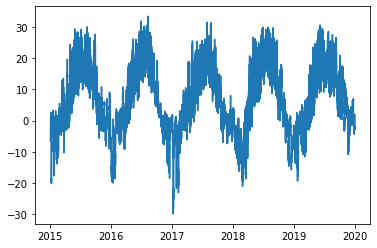

In [0]:
plt.plot(data.index, data['T'])

In [0]:
data['time'].dt.hour  # запись .dt позволяет обращаться к функциям времени и получить час

Местное время в Москве (ВДНХ)
2015-01-01 00:00:00     0
2015-01-01 01:00:00     1
2015-01-01 02:00:00     2
2015-01-01 03:00:00     3
2015-01-01 04:00:00     4
                       ..
2020-01-01 09:00:00     9
2020-01-01 12:00:00    12
2020-01-01 15:00:00    15
2020-01-01 18:00:00    18
2020-01-01 21:00:00    21
Name: time, Length: 17647, dtype: int64

In [0]:
data_daily = data[data['time'].dt.hour == 12]  # отфильтровали только записи, сделанные в полдень

In [0]:
data_daily

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,time
Местное время в Москве (ВДНХ),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 12:00:00,01.01.2015 12:00,-1.5,743.6,758.5,0.2,96.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,"90 или более, но не 100%",Снег с перерывами слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",70 – 80%.,1000-1500,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",4.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 12:00:00
2015-01-02 12:00:00,02.01.2015 12:00,1.5,737.6,752.2,-0.5,97.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02 12:00:00
2015-01-03 12:00:00,03.01.2015 12:00,2.4,726.1,740.4,0.6,89.0,"Ветер, дующий с запада",2,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,NaN,NaN,4.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-03 12:00:00
2015-01-04 12:00:00,04.01.2015 12:00,0.8,722.2,736.5,0.2,93.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,100%.,Ливневый снег слабый в срок наблюдения или за ...,Ливень (ливни).,Снег или дождь со снегом.,NaN,NaN,Кучево-дождевые волокнистые (часто с наковальн...,100%.,300-600,NaN,NaN,4.0,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-04 12:00:00
2015-01-05 12:00:00,05.01.2015 12:00,-8.5,733.3,748.4,1.2,79.0,"Ветер, дующий с северо-запада",3,NaN,NaN,100%.,Снег с перерывами слабый в срок наблюдения.,Снег или дождь со снегом.,Песчаная или пыльная буря или снежная низовая ...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",60%.,600-1000,"Высококучевые, просвечивающие или плотные в дв...",NaN,4.0,-11.5,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-05 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28 12:00:00,28.12.2019 12:00,-0.7,751.6,766.6,1.5,91.0,"Ветер, дующий с северо-востока",2,NaN,NaN,100%.,Дымка. Диаметр отложения при гололеде составл...,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,NaN,NaN,4.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-28 12:00:00
2019-12-29 12:00:00,29.12.2019 12:00,-3.6,759.3,774.6,0.5,88.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,NaN,NaN,4.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-29 12:00:00
2019-12-30 12:00:00,30.12.2019 12:00,-3.4,748.6,763.7,-3.3,84.0,"Ветер, дующий с юго-запада",2,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,4.0,-5.8,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-30 12:00:00


In [0]:
data_daily['T'].min()

-26.9

In [0]:
data_daily['T'].max()

31.7

In [0]:
data_daily['T'].mean() # среднее

8.772836801752456

In [0]:
data_daily.describe()  # функция, которая выводит некоторую статистику по колонкам

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg
count,1826.000000,1826.000000,1826.000000,1815.000000,1825.000000,1826.000000,19.000000,86.000000,0.0,0.0,1820.000000,1825.000000,0.0,0.0
mean,8.772837,747.612103,762.026177,0.021543,65.252055,1.570646,10.421053,11.046512,NaN,NaN,8.523187,1.607507,NaN,NaN
std,10.986743,7.655981,7.868374,0.912714,20.220360,0.801159,0.606977,1.264046,NaN,NaN,2.664971,8.619287,NaN,NaN
min,-26.900000,718.200000,732.400000,-5.200000,14.000000,0.000000,10.000000,10.000000,NaN,NaN,0.200000,-30.500000,NaN,NaN
25%,0.400000,742.600000,756.900000,-0.500000,49.000000,1.000000,10.000000,10.000000,NaN,NaN,10.000000,-4.200000,NaN,NaN
50%,8.050000,747.500000,761.800000,0.000000,68.000000,1.000000,10.000000,11.000000,NaN,NaN,10.000000,1.100000,NaN,NaN
75%,18.500000,752.500000,766.900000,0.500000,83.000000,2.000000,11.000000,12.000000,NaN,NaN,10.000000,8.700000,NaN,NaN
max,31.700000,774.100000,789.100000,4.900000,100.000000,5.000000,12.000000,14.000000,NaN,NaN,10.000000,19.900000,NaN,NaN


In [0]:
# Скользящие функции показывают динамику во времени: график средних значений на 100-дневных интервалах
data_daily['T'].rolling(100).mean()

Местное время в Москве (ВДНХ)
2015-01-01 12:00:00      NaN
2015-01-02 12:00:00      NaN
2015-01-03 12:00:00      NaN
2015-01-04 12:00:00      NaN
2015-01-05 12:00:00      NaN
                       ...  
2019-12-28 12:00:00    5.193
2019-12-29 12:00:00    5.050
2019-12-30 12:00:00    4.919
2019-12-31 12:00:00    4.849
2020-01-01 12:00:00    4.768
Name: T, Length: 1826, dtype: float64

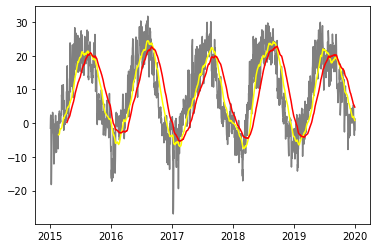

In [0]:
plt.plot(data_daily.index, data_daily['T'], color='gray')

plt.plot(data_daily.index, data_daily['T'].rolling(50).mean(), color='yellow')
plt.plot(data_daily.index, data_daily['T'].rolling(100).mean(), color='red')

In [0]:
# Гистограммы - графики, показывающее, насколько часто встречается значение

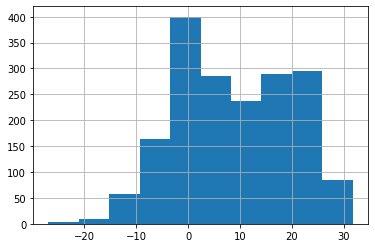

In [0]:
data_daily['T'].hist()

In [0]:
# "95% Квантиль = 23.3 градусов": с вероятность 95% значение не превисит число 23.3

In [0]:
data_daily['T'].quantile(0.95)

25.575000000000003

In [0]:
# размножим значение, чтобы получить столбец и отрисовать его на графике
N = len(data_daily) # количество записей
# Список длины N со скопированным значением квантиля - размножили список из 1 элемента N раз
quant_95 = [data_daily['T'].quantile(0.95)] * N  # 95%
quant_05 = [data_daily['T'].quantile(0.05)] * N  # 5%

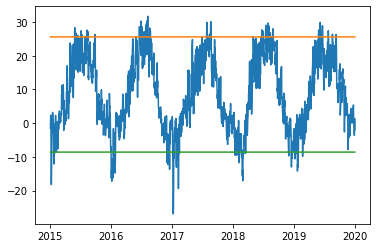

In [0]:
plt.plot(data_daily.index, data_daily['T'])
plt.plot(data_daily.index, quant_95)
plt.plot(data_daily.index, quant_05)

In [0]:
# Корреляция - значение, которое показывает, насколько движение двух рядов "похожи"
# Корреляция = 1 - направление движений рядов совпадают
# Корреляция = -1 - направление движений рядов строго противоположны
# Корреляция = 0 - направление движений никак не связаны

In [0]:
data_daily.corr()  # попарные корреляции для всех столбцов
# -5.686470e-02 - -5 * (-10 в -2 степени) = -0.05

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg
T,1.000000,-0.056865,-0.131045,-0.159286,-0.583357,-0.034213,-0.081730,-0.144274,NaN,NaN,0.328953,0.872651,NaN,NaN
Po,-0.056865,1.000000,0.997156,0.001547,-0.249514,-0.042569,-0.166724,-0.040741,NaN,NaN,0.283676,-0.212972,NaN,NaN
P,-0.131045,0.997156,1.000000,0.012089,-0.205494,-0.039748,-0.158226,-0.034599,NaN,NaN,0.257832,-0.277593,NaN,NaN
Pa,-0.159286,0.001547,0.012089,1.000000,0.165265,0.121067,0.096644,0.204468,NaN,NaN,0.019382,-0.080330,NaN,NaN
U,-0.583357,-0.249514,-0.205494,0.165265,1.000000,-0.146930,-0.049507,-0.029659,NaN,NaN,-0.638709,-0.123511,NaN,NaN
Ff,-0.034213,-0.042569,-0.039748,0.121067,-0.146930,1.000000,0.239165,0.276912,NaN,NaN,0.086406,-0.117703,NaN,NaN
ff10,-0.081730,-0.166724,-0.158226,0.096644,-0.049507,0.239165,1.000000,0.623182,NaN,NaN,0.064293,-0.122197,NaN,NaN
ff3,-0.144274,-0.040741,-0.034599,0.204468,-0.029659,0.276912,0.623182,1.000000,NaN,NaN,0.020867,-0.185849,NaN,NaN
Tn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Автокорреляция - корреляция ряда с собой, но сдвинутым

X1 = [1, 2, 3, 2, 1, 2, 3, 2, 1]
X2 = [            1, 2, 3, 2, 1, 2, 3, 2, 1]

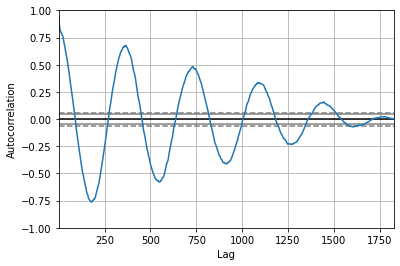

In [0]:
# график автокорреляции: график, который показывает величину корреляции в зависимости от смещения (Lag)
pd.plotting.autocorrelation_plot(data_daily['T'])

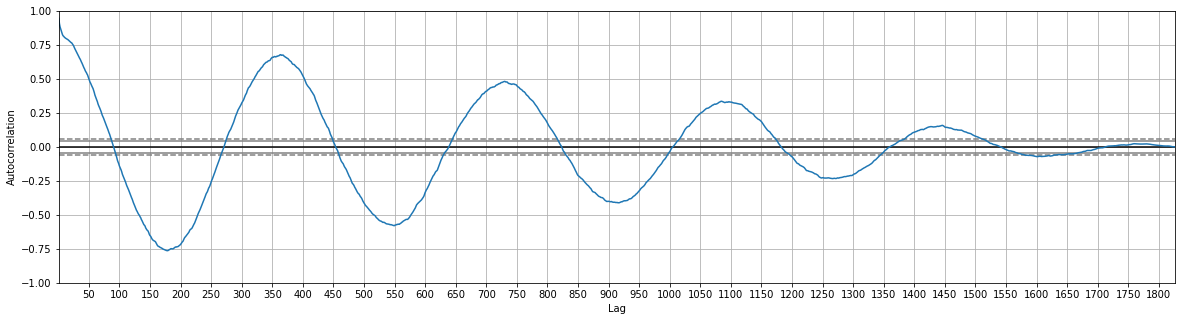

In [0]:
plt.figure(figsize=(20, 5))  # размер графика
pd.plotting.autocorrelation_plot(data_daily['T'])
plt.locator_params(axis='x', nbins=50)

In [0]:
# Из графика видно, что график максимально "похож" сам на себя при сдвиге равном ~360 => цикл ~360

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
regressor = LinearRegression()  # модель регрессии - проводим прямую линия между точками

In [0]:
# Диапазон от 0 длины N
x_range = list(range(N))
X = pd.DataFrame(x_range)  
# Таблица с номерами строк (регрессор требует данные в формате таблица + столбец итоговых значений)
X

,0
0,0
1,1
2,2
3,3
4,4
...,...
1821,1821
1822,1822
1823,1823
1824,1824


In [0]:
regressor.fit(X, data_daily['T'])  
# Модель обучилась - для значений из таблицы X проведена прямая линия, чтобы быть наиболее близкой к значениям в колонке температур

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
result = regressor.predict(X)  # точки на прямой линии

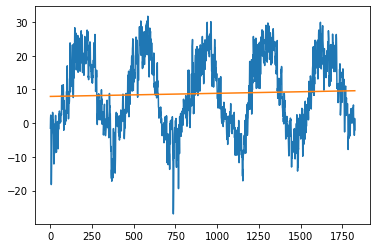

In [0]:
plt.plot(X.index, data_daily['T'])  # нужна общая шкала для 2 графиков =>индекс заменен на новый
plt.plot(X.index, result)

In [0]:
# seaborn - надстройка на matlotlib, которая делает более "красивые" графики